In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('User_Data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [20]:
df.shape

(400, 5)

In [21]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [22]:
df.drop('User ID',inplace=True,axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [23]:
df[df.duplicated()]

,Gender,Age,EstimatedSalary,Purchased
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [25]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [26]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


<AxesSubplot:>

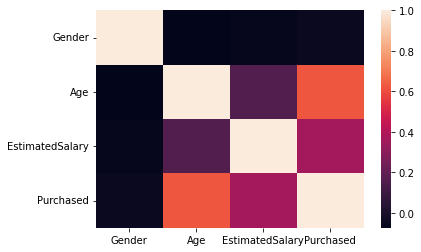

In [28]:
sns.heatmap(df.corr())

In [29]:
x = df.iloc[:,:-1] #independent variable

y = df.iloc[:,-1:] #dependent variable

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)

In [32]:
x = pd.DataFrame(scaled_data,columns=['Gender','Age','EstimatedSalary'])
x

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751
...,...,...,...
395,-0.980196,0.797057,-0.844019
396,1.020204,1.274623,-1.372587
397,-0.980196,1.179110,-1.460681
398,1.020204,-0.158074,-1.078938


In [33]:
#split data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=1)

# Logistic Regression

In [34]:
#Here we use logistic Regression Algorithm to trian model
from sklearn.linear_model import LogisticRegression
logi_regg = LogisticRegression()
logi_regg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [35]:
#predict the test data
y_pred_logi = logi_regg.predict(x_test)

In [36]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_logi = accuracy_score(y_test,y_pred_logi)
print('Accuracy of model is : ',score_logi)

error_logi = confusion_matrix(y_test,y_pred_logi)
print("Correct and Incorrect input data :'\n'", error_logi)

Accuracy of model is :  0.825
Correct and Incorrect input data :'
' [[197  10]
 [ 46  67]]


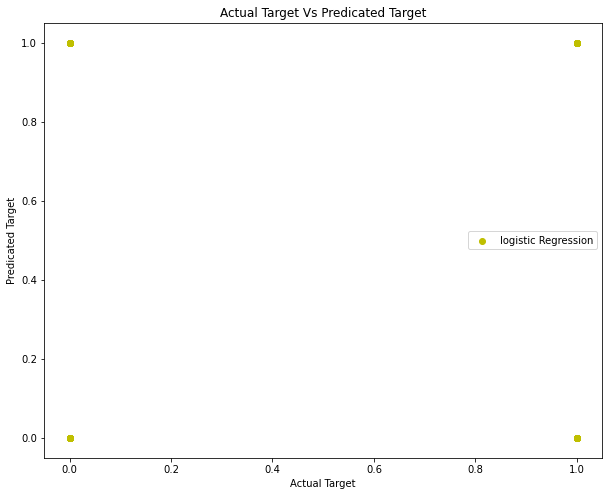

In [37]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_logi,c='y',label='logistic Regression')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# K-Nearest Neighbours

In [38]:
from sklearn.neighbors import KNeighborsClassifier
list1 = []
list2 = []
for i in range(3,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    from sklearn.metrics import accuracy_score
    y_pred = knn.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    list1.append(score)
    list2.append(i)
print(list1)
print(list2)
#print(i)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.875, 0.859375, 0.815625, 0.80625, 0.7875, 0.775, 0.778125, 0.778125, 0.778125, 0.7875, 0.784375, 0.765625, 0.759375, 0.75625, 0.746875, 0.74375, 0.75625, 0.75625, 0.75, 0.734375, 0.70625, 0.7, 0.696875, 0.696875]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [41]:
df = pd.DataFrame(list1,columns=['score'])
df['k_values'] = list2
df

,score,k_values
0,0.875000,3
1,0.859375,5
2,0.815625,7
3,0.806250,9
4,0.787500,11
5,0.775000,13
6,0.778125,15
7,0.778125,17
8,0.778125,19
9,0.787500,21


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_values', ylabel='score'>

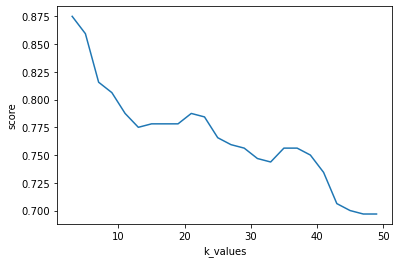

In [42]:
#here we plot the line graph
sns.lineplot(df.k_values,df.score)
#df.plot(x = 'k_values',y='score',kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


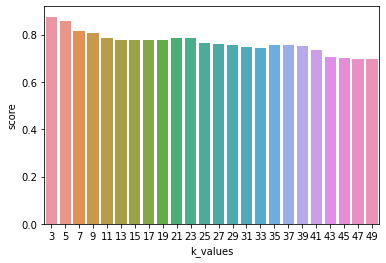

In [43]:
#df.plot(x = 'mse',y='k_values',kind='bar')
sns.barplot(df.k_values,df.score)
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred_knn = knn.predict(x_test)

In [46]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy of model is : ',score_knn)

error_knn = confusion_matrix(y_test,y_pred_knn)
print("Correct and Incorrect input data :'\n'", error_knn)

Accuracy of model is :  0.875
Correct and Incorrect input data :'
' [[193  14]
 [ 26  87]]


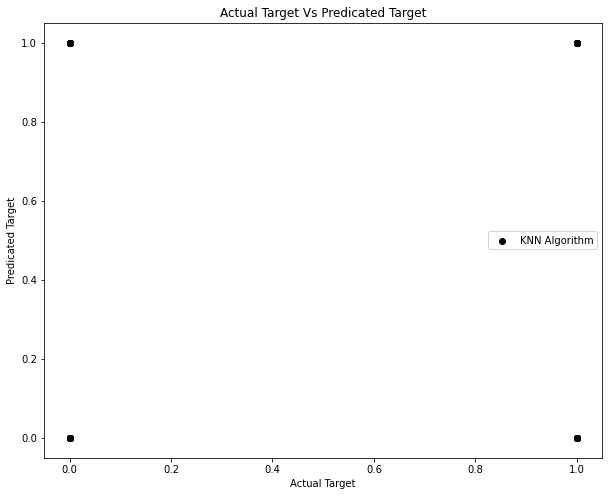

In [47]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_knn,c='k',label='KNN Algorithm')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Support Vector Machine Algorithm

In [48]:
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
kernel_name = ['linear', 'poly', 'rbf','sigmoid'] #{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
score_store = []
for i in kernel_name:
    cv_classification = svm.SVC(kernel=i)#SVC = support vector classifier
    cv_classification.fit(x_train,y_train)
    y_pred = cv_classification.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    score_store.append(score)
score_store

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[0.834375, 0.825, 0.890625, 0.80625]

In [50]:
df1 = pd.DataFrame(score_store,columns=['score'])
df1['kernal'] = kernel_name
df1

,score,kernal
0,0.834375,linear
1,0.825000,poly
2,0.890625,rbf
3,0.806250,sigmoid


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kernal', ylabel='score'>

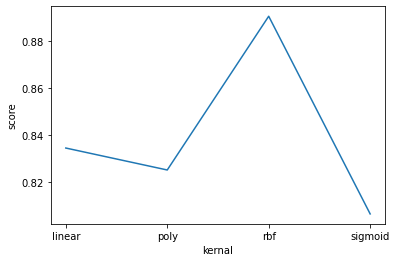

In [51]:
#here we plot the line graph
sns.lineplot(df1.kernal,df1.score)
#df1.plot(x = 'kernal',y='score',kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


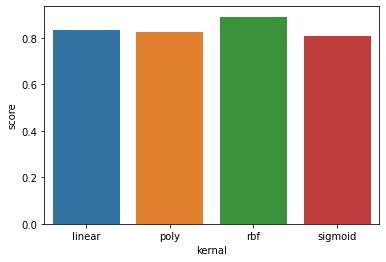

In [53]:
#df1.plot(x = 'score',y='k_values',kind='bar')
sns.barplot(df1.kernal,df1.score)
plt.show()

In [54]:
#Used support vector machine
cv_classification = svm.SVC(kernel='rbf')    #SVC = support vector classifier
cv_classification.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [55]:
y_pred_svm = cv_classification.predict(x_test)

In [56]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy of model is : ',score_svm)

error_svm = confusion_matrix(y_test,y_pred_svm)
print("Correct and Incorrect input data :'\n'", error_svm)

Accuracy of model is :  0.890625
Correct and Incorrect input data :'
' [[192  15]
 [ 20  93]]


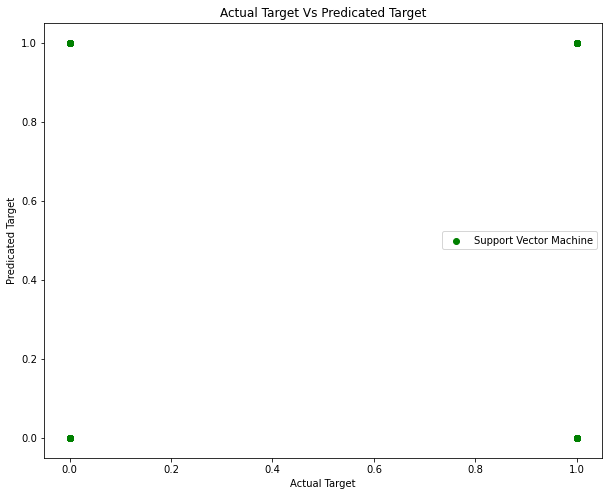

In [57]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_svm,c='g',label='Support Vector Machine')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Decision Tree Classification Algorithm

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy') # entropy = information gain
dt_classifier.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy')

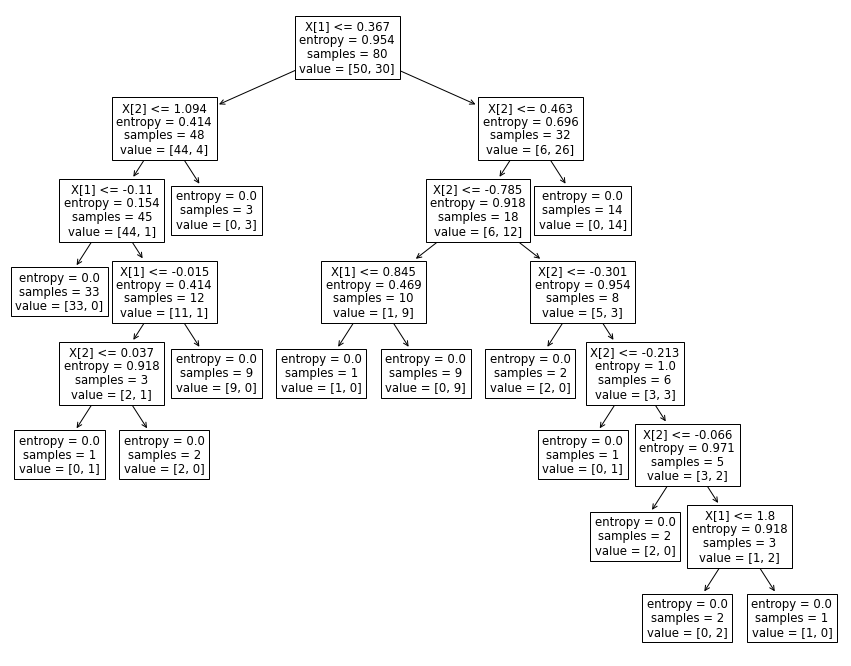

In [59]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
x=tree.plot_tree(dt_classifier)

In [60]:
y_pred_dt = dt_classifier.predict(x_test)

In [61]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy of model is : ',score_dt)

error_dt = confusion_matrix(y_test,y_pred_dt)
print("Correct and Incorrect input data :'\n'", error_dt)

Accuracy of model is :  0.8125
Correct and Incorrect input data :'
' [[179  28]
 [ 32  81]]


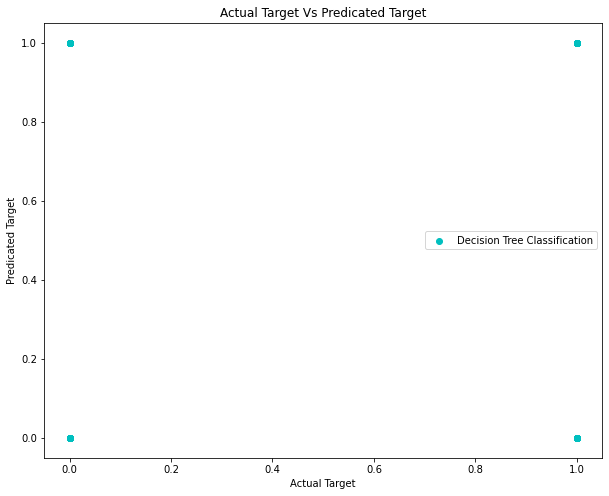

In [62]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_dt,c='c',label='Decision Tree Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Navie Bayer Classification Algorithm

In [63]:
from sklearn.naive_bayes import GaussianNB
NBCA = GaussianNB()
NBCA.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [64]:
y_pred_nb = NBCA.predict(x_test)

In [65]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_nb = accuracy_score(y_test,y_pred_nb)
print('Accuracy of model is : ',score_nb)

error_nb = confusion_matrix(y_test,y_pred_nb)
print("Correct and Incorrect input data :'\n'", error_nb)

Accuracy of model is :  0.878125
Correct and Incorrect input data :'
' [[196  11]
 [ 28  85]]


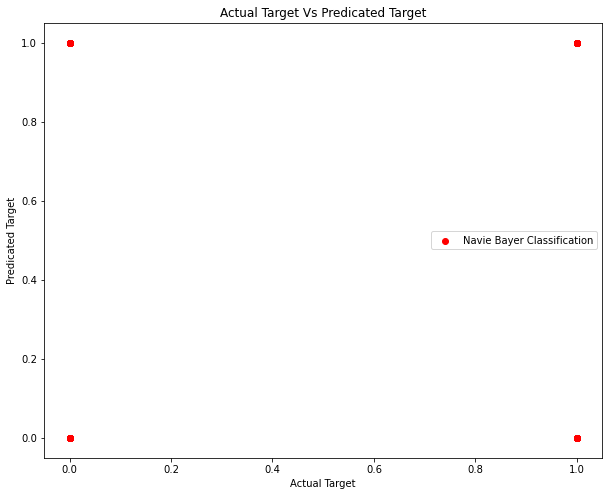

In [66]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_nb,c='r',label='Navie Bayer Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Random Forest Classification Algorithm

In [67]:
from sklearn.ensemble import RandomForestClassifier
RFAClass = RandomForestClassifier(n_estimators=50) #n_estimators less error maximum and more error less
RFAClass.fit(x_train,y_train)
RFAClass.fit(x_train,y_train)

C:\Users\vbkat\AppData\Local\Temp/ipykernel_20168/1543761169.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFAClass.fit(x_train,y_train)
C:\Users\vbkat\AppData\Local\Temp/ipykernel_20168/1543761169.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFAClass.fit(x_train,y_train)


RandomForestClassifier(n_estimators=50)

In [68]:
y_pred_rf = RFAClass.predict(x_test)

In [69]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy of model is : ',score_rf)

error_rf = confusion_matrix(y_test,y_pred_rf)
print("Correct and Incorrect input data :'\n'", error_rf)

Accuracy of model is :  0.8625
Correct and Incorrect input data :'
' [[191  16]
 [ 28  85]]


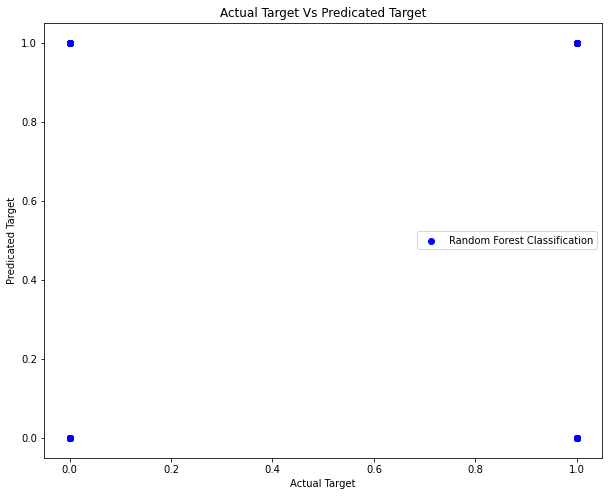

In [70]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_rf,c='b',label='Random Forest Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# All Classification Type algorithm result


In [71]:
print('Logistic Regression')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_logi = accuracy_score(y_test,y_pred_logi)
print('Accuracy of model is : ',score_logi)

error_logi = confusion_matrix(y_test,y_pred_logi)
print("Correct and Incorrect input data :'\n'", error_logi)


print('\n KNN Classification')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy of model is : ',score_knn)

error_knn = confusion_matrix(y_test,y_pred_knn)
print("Correct and Incorrect input data :'\n'", error_knn)

print('\n Support Vector Machine classification Algorithm')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy of model is : ',score_svm)

error_svm = confusion_matrix(y_test,y_pred_svm)
print("Correct and Incorrect input data :'\n'", error_svm)

print('\n Decision Tree Classifcation Algorithm')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy of model is : ',score_dt)

error_dt = confusion_matrix(y_test,y_pred_dt)
print("Correct and Incorrect input data :'\n'", error_dt)
      
      

print('\n Navie Bayes Classification Algorithms')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_nb = accuracy_score(y_test,y_pred_nb)
print('Accuracy of model is : ',score_nb)

error_nb = confusion_matrix(y_test,y_pred_nb)
print("Correct and Incorrect input data :'\n'", error_nb)
      
      
print('\n Random Forest classification Algorithm')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy of model is : ',score_rf)

error_rf = confusion_matrix(y_test,y_pred_rf)
print("Correct and Incorrect input data :'\n'", error_rf)

Logistic Regression
Accuracy of model is :  0.825
Correct and Incorrect input data :'
' [[197  10]
 [ 46  67]]

 KNN Classification
Accuracy of model is :  0.875
Correct and Incorrect input data :'
' [[193  14]
 [ 26  87]]

 Support Vector Machine classification Algorithm
Accuracy of model is :  0.890625
Correct and Incorrect input data :'
' [[192  15]
 [ 20  93]]

 Decision Tree Classifcation Algorithm
Accuracy of model is :  0.8125
Correct and Incorrect input data :'
' [[179  28]
 [ 32  81]]

 Navie Bayes Classification Algorithms
Accuracy of model is :  0.878125
Correct and Incorrect input data :'
' [[196  11]
 [ 28  85]]

 Random Forest classification Algorithm
Accuracy of model is :  0.8625
Correct and Incorrect input data :'
' [[191  16]
 [ 28  85]]


In [72]:
Algorithm = ['Logistic Regression','K-NN','Support VM','Decision Tree','Navie Bayer','Random Forest']
score = [score_logi,score_knn,score_svm,score_dt,score_nb,score_rf]
df_plot = pd.DataFrame(Algorithm,columns=['Algorithm_Name'])
df_plot['Accuracy_Score']=score
df_plot

,Algorithm_Name,Accuracy_Score
0,Logistic Regression,0.825000
1,K-NN,0.875000
2,Support VM,0.890625
3,Decision Tree,0.812500
4,Navie Bayer,0.878125
5,Random Forest,0.862500


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


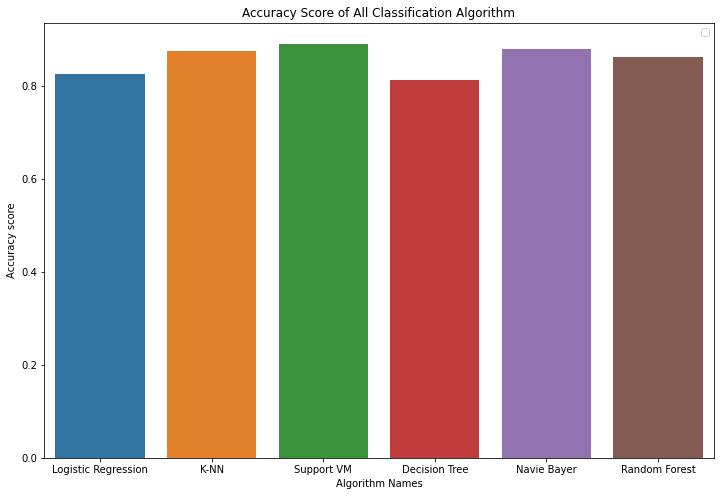

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(df_plot.Algorithm_Name,df_plot.Accuracy_Score)
plt.xlabel('Algorithm Names')
plt.ylabel('Accuracy score')
plt.title('Accuracy Score of All Classification Algorithm')
plt.legend()

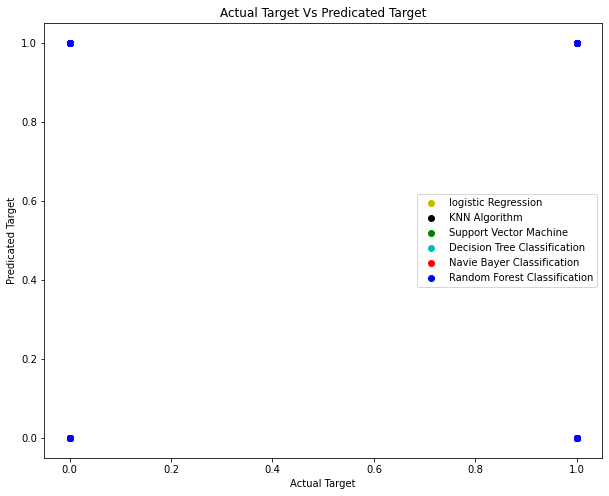

In [74]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_logi,c='y',label='logistic Regression')
plt.scatter(y_test,y_pred_knn,c='k',label='KNN Algorithm')
plt.scatter(y_test,y_pred_svm,c='g',label='Support Vector Machine')
plt.scatter(y_test,y_pred_dt,c='c',label='Decision Tree Classification')
plt.scatter(y_test,y_pred_nb,c='r',label='Navie Bayer Classification')
plt.scatter(y_test,y_pred_rf,c='b',label='Random Forest Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()